  # Sentiment Analysis of Trip Advisor Hotel Reviews

## Motivation
Hotels business play the most important role in travel industry. Having the clear understanding of the key aspects what make the hotels experience from customer good or bad is crucial to develop the businesses. 

### Building classification models

#### Importing all necessary libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
import numpy as np
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

### Importing and Exploring the Dataset

In [2]:
df = pd.read_csv("../../datasets/tripadvisor_reviews.csv")

In [3]:
df.shape

(20491, 2)

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
#Checking the null values in dataset
df.notnull()

,Review,Rating
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
20486,True,True
20487,True,True
20488,True,True
20489,True,True


In [7]:
#Chechking total nullvalue in the dataset
df.isnull().sum()

Review    0
Rating    0
dtype: int64

### Exploratory Data Analyisis (EDA)

Using EDA to analyze and visualize the dateset.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hotels Ratings')

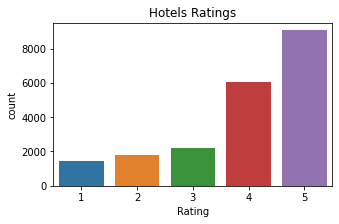

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(df["Rating"])
plt.title("Hotels Ratings")

### Data Cleaning & Preprocessing

In [9]:
import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/phamthianhthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [11]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [12]:
# cleaning the nosie text, special charchters and html tags form the data set

def remove_noise_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub('\[[^]]*\]&^@_+#!*()', '', text)
    return text

In [13]:
corpus=[]

In [14]:
for i in range(0, 20491):
    rev = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if not word in set(all_stopwords)]
    rev = ' '.join(rev)
    corpus.append(rev)

In [16]:
corpus

['nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow not soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice not goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot th anniversari seattl start book suit paid extra websit descript not suit bedroom bathroom standard hotel room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript 

### Feature engineering

#### Data Transformation 

To convert our clean dataset in to Bag of words represntation

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 10)

In [18]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,  -1].values

### Pickle module

In [19]:
## import pickel liabrary
import pickle

## Use pickel to create the bag of word dictionary

BOW = df['Review']
file = "Bwords.pkl"
file_obj = open(file, 'wb')
pickle.dump(BOW, file_obj)
file_obj.close()

file = "Bwords.pkl"
file_obj = open(file, 'rb')
Bwords = pickle.load(file_obj)
print(Bwords)

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object


### Train reviews Normalization

In [20]:
normal_train_review=df.Review[:45000]
normal_train_review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

<function matplotlib.pyplot.show(close=None, block=None)>

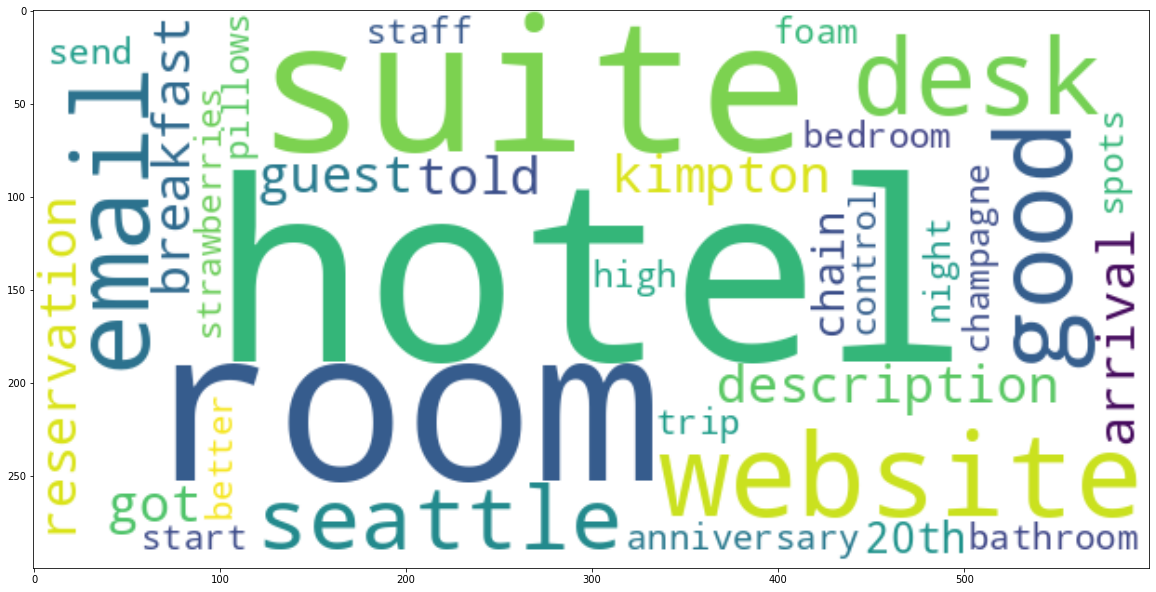

In [21]:
## Word Cloud to visualize Positiv train Reviews 

plt.figure(figsize=(20,20))
pos_txt=normal_train_review[1]
Wor_Cld=WordCloud(width=600,height=300,background_color='white',max_words=5000,min_font_size=15)
positive_words=Wor_Cld.generate(pos_txt)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

### Test reviews Normalization 

In [22]:
normal_test_review=df.Review[30000:]
normal_test_review

Series([], Name: Review, dtype: object)

<function matplotlib.pyplot.show(close=None, block=None)>

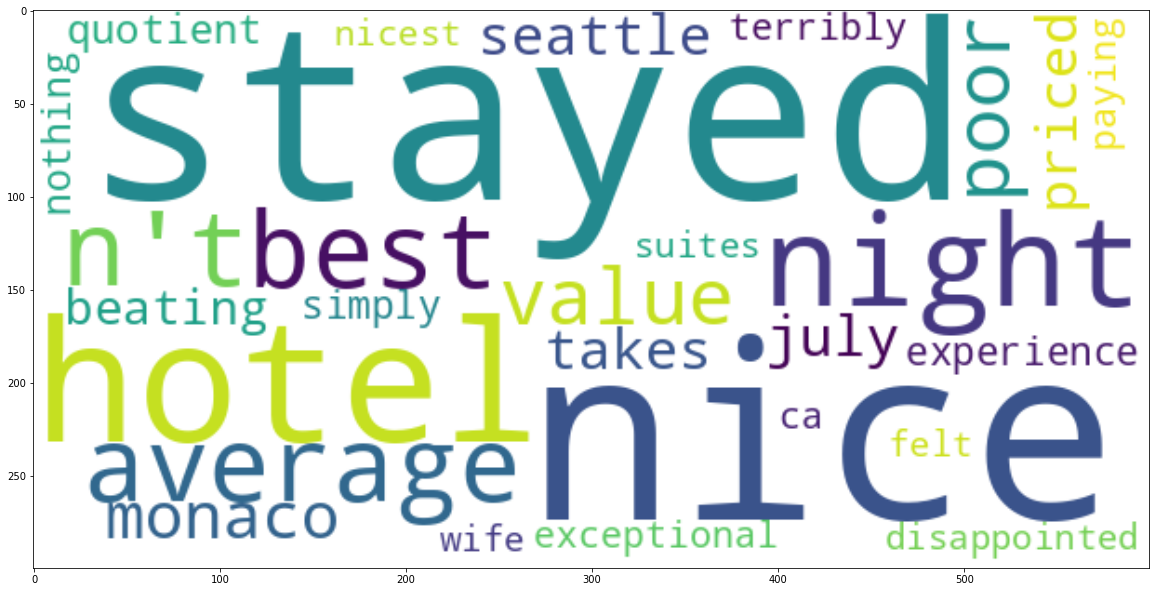

In [23]:
## Word Cloud to visualize negative train Reviews

plt.figure(figsize=(20,20))
negative_text=normal_train_review[10]
Wr_Cl=WordCloud(width=600,height=300,background_color='white',max_words=400,min_font_size=15)
negative_words=Wr_Cl.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

### Stop Words 

In [24]:
## Stop word removing for english

from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

all_words = df['Review']
for word in all_words: 
    if word not in en_stops:
        print(word)

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  
ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike k

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




better view st. regis stayed night prior night wedding, hotel just rennovated recently argent hotel, think executive suite view amazing, brand new 2 plasma t.v., held reception wedding ran smoothly, ca n't think negatives head maybe sentimental attachment hotel,  
happy traveller husband stayed argent nights san fran, fantastic surprise expecting relatively nice great, room huge impecable location handy alsoi recommended friends definately stay, didnt eat restaurant room service just san fran,  
lovely hotel less-than-great desk stayed argent 2 days recent visit sf, chose price location close public transportation, read reviews hopeful leave wanting write glowing review, say came neutral desk left sour taste mouth, arrived 3 p.m. check-in time no rooms available according surly woman desk, special rate gotten alleged not upgrade, stated come parking car did hearst garage street paid 2 days paid argent garage asked return no sooner hour just flowin san jose chicago 4 hours driven sf 90

### Tokenization

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/phamthianhthu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
#word_tokenizing

all_words = nltk.word_tokenize(word)
print(all_words)

['people', 'talking', ',', 'ca', "n't", 'believe', 'excellent', 'ratings', 'hotel', ',', 'just', "n't", ',', 'yes', 'patricia', 'extremely', 'helpful', 'fluent', 'languages', 'goes', 'way', 'make', 'welcome', ',', 'said', 'place', 'bit', 'dump', ',', 'inexpensive', 'hotel', 'expensive', 'city', 'place', 'bit', 'dated', 'institutional', 'odor', 'charm', 'funeral', 'home', ',', 'walking', 'steps', 'hotel', 'girlfriend', 'step', 'condom', 'yes', 'condom', 'steps', ',', 'lots', 'guys', 'hanging', 'desk', 'hallway', ',', 'girlfriend', 'swears', 'house', 'prostitution', ',', 'patricia', 'did', 'arrange', 'taxi', 'following', 'morning', 'stayed', 'night', 'did', 'wrong', 'information', 'cost', 'fare', ',', 'rooms', 'clean', 'large', 'bathroom', 'small', ',', 'passable', 'night', 'glad', 'leave', 'following', 'morning', 'not', 'recommend', 'extended', 'stay', 'unless', 'tight', 'budget', "n't", 'care', 'look', 'feel', 'place', ',']


In [37]:
doc = all_words
countvect = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
countoccours = countvect.fit_transform(doc)

### Dividing dataset into training and testing set

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.20, random_state=10)

In [29]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(16392, 10) (4099, 10)
(16392,) (4099,)


## Model Perfomence

#### Logistic Regression 

In [41]:

from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression()
log_re.fit(X_train, y_train)
log_re.score(X_test, y_test)

0.47962917784825565

### Prediction

In [31]:
y_pred = log_re.predict(X_test)

              precision    recall  f1-score   support

           1       0.22      0.40      0.29       159
           2       0.12      0.28      0.16       144
           3       0.01      0.37      0.03        19
           4       0.23      0.43      0.30       641
           5       0.88      0.50      0.64      3136

    accuracy                           0.48      4099
   macro avg       0.29      0.40      0.28      4099
weighted avg       0.72      0.48      0.55      4099

Accuracy of the Logistic Regrassion Model: 47.962917784825564%


Text(0.5, 1.0, 'Confusion Matrix of the Logistic Regrassion Model')

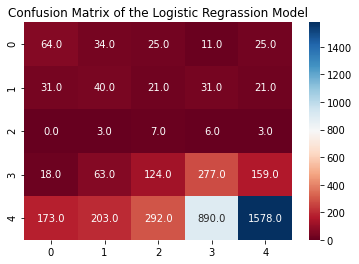

In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


accry = accuracy_score(y_pred, y_test)
result = classification_report(y_pred, y_test)
print(result)

conf_mtx = confusion_matrix(y_pred, y_test)
print("Accuracy of the Logistic Regrassion Model: {}%".format(accry*100))
sns.heatmap(conf_mtx, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix of the Logistic Regrassion Model")

### Conclusion

The Sentiment Anslyse was done on Trip Advisor Hotel reviews dataset. Using all the necessary libraries to build the models, feature engineering and exploring the dataset. Using various classifications model to find the accuracy. Choosing Logistic Regression model and predict with Confusion Matrix.

## References

https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/code
www.kaggle.com. (n.d.). Trip Advisor Hotel Reviews. [online] Available at: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/code [Accessed 28 Jun. 2022].